# Flights - Exploratory Data Analysis

Dataset reference: [Kaggle link - Flight Delay dataset](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022)

Questions answered:
1. What is the nature of data available to you? (All textual? Tabular? etc.)
    1. The data has been organized in tabular formats spread across multiple files.
    2. It also has some textual data in the form of names and descriptions.
2. What are other (additional) data sources you can access to achieve your objectives? (Please name them even if you cannot access them)
    1. [US Department of Transportation (DOT)](https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report)
    2. [Kaggle](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022)
    3. [Weather forecast US](https://www.weather.gov/forecastmaps)
3. Prepare the data for DataRobot
    1. 
4. Conduct exploratory data analysis
    1. Performed different visualizations and statistics analysis to understand and following are the conclusions:
5. Address target leakage (Make sure you justify the existence or absence of target leakage)
    1. There are some independent variables that might cause target leakage such as DepDelay (Departure delay), Diverted, etc. which may indicate that the flights were delayed.

# Install commands
1. !pip install pyarrow fastparquet seaborn
2. !pip install calmap plotly_calplot -q

In [1]:
# !pip install pyarrow fastparquet seaborn
# !pip install calmap plotly_calplot -q

In [2]:
# import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from glob import glob

In [3]:
# Some display settings
pd.set_option("display.max_columns", 500)

plt.style.use("seaborn-colorblind")

pal = sns.color_palette()

In [4]:
# Data paths

dir_root = '../data/flights/'

list_files = [x for x in os.walk(dir_root)][0][2]
list_files.sort()

# display(list_files)

In [5]:
# !ls -GFlash ../data/flights/ | grep parquet

In [6]:
# !ls -GFlash ../data/flights/ | grep csv

# Read in and Format Data

In [7]:
glob_path = os.path.join(dir_root, '*.parquet')
parquet_files = glob(glob_path)
# parquet_files

In [8]:
column_subset = [
    'Year','Quarter', 'Month', 'DayofMonth', 'DayOfWeek', "FlightDate",
    "Airline", "Flight_Number_Marketing_Airline",
    "Origin", "OriginAirportID", "OriginCityName", "OriginStateName",
    "Dest", "DestAirportID", "DestCityName", "DestStateName",
    "Cancelled", "Diverted",
    "CRSDepTime", "CRSArrTime",
    "ArrTime", "ArrDelayMinutes",
    "DepTime", "DepDelayMinutes",
    "TaxiOut", "TaxiIn"
]

column_subset = [
    'Year','Quarter',
    "Airline",
    "OriginStateName",
    "DestStateName",
    "Cancelled", "Diverted",
    "ArrTime", "ArrDelayMinutes",
    "DepTime", "DepDelayMinutes"
]

dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset))
df = pd.concat(dfs).reset_index(drop=True)

cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [9]:
list_numerical_cols = ['ArrTime', 'ArrDelayMinutes', 'DepTime', 'DepDelayMinutes']
df[list_numerical_cols].describe()

# df.to_csv(os.path.join(dir_root, f"df_combined_filtered.csv"), index=False)

ArrTime  ArrDelayMinutes       DepTime  DepDelayMinutes
count  2.840760e+07     2.834760e+07  2.843213e+07     2.843070e+07
mean   1.468046e+03     1.280992e+01  1.329296e+03     1.278311e+01
std    5.256177e+02     4.579959e+01  4.949750e+02     4.617337e+01
min    1.000000e+00     0.000000e+00  1.000000e+00     0.000000e+00
25%    1.055000e+03     0.000000e+00  9.200000e+02     0.000000e+00
50%    1.505000e+03     0.000000e+00  1.323000e+03     0.000000e+00
75%    1.910000e+03     6.000000e+00  1.736000e+03     5.000000e+00
max    2.400000e+03     7.232000e+03  2.400000e+03     7.223000e+03

In [10]:
list_extra_cols = ['AirTime', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','CancellationCode',]

def compute_agg_data(df_x):
    list_cols = ['Year','Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
                 'Operating_Airline ',
                 'OriginAirportID','OriginState', 
                 'DestAirportID', 'DestState',
                 'DepDelay', 'ArrDelay',
                 'Cancelled', 'Diverted', 
                ]
    
    list_group_by = {
        'origin_airport': ['OriginAirportID'],
        'dest_airport':['DestAirportID'],
        'origin_dest_state':['OriginState', 'DestState'],
        'airline':['Operating_Airline '],
        'month':['Month'],
        'day_of_week':['DayOfWeek'],
        'quarter':['Quarter'],
        'year_quarter':['Year', 'Quarter'],
    }
    
    

In [11]:
list_columns = list(df.columns)
list_columns

display(df.head())

Year  Quarter  Month  DayofMonth  DayOfWeek FlightDate            Airline  \
0  2018        1      1          23          2 2018-01-23  Endeavor Air Inc.   
1  2018        1      1          24          3 2018-01-24  Endeavor Air Inc.   
2  2018        1      1          25          4 2018-01-25  Endeavor Air Inc.   
3  2018        1      1          26          5 2018-01-26  Endeavor Air Inc.   
4  2018        1      1          27          6 2018-01-27  Endeavor Air Inc.   

   Flight_Number_Marketing_Airline Origin  OriginAirportID OriginCityName  \
0                             3298    ABY            10146     Albany, GA   
1                             3298    ABY            10146     Albany, GA   
2                             3298    ABY            10146     Albany, GA   
3                             3298    ABY            10146     Albany, GA   
4                             3298    ABY            10146     Albany, GA   

  OriginStateName Dest  DestAirportID DestCityName DestStateName  Cancelled  \
0         Georgia  ATL          10397  Atlanta, GA       Georgia      False   
1         Georgia  ATL          10397  Atlanta, GA       Georgia      False   
2         Georgia  ATL          10397  Atlanta, GA       Georgia      False   
3         Georgia  ATL          10397  Atlanta, GA       Georgia      False   
4         Georgia  ATL          10397  Atlanta, GA       Georgia      False   

   Diverted  CRSDepTime  CRSArrTime  ArrTime  ArrDelayMinutes  DepTime  \
0     False        1202        1304   1256.0              0.0   1157.0   
1     False        1202        1304   1258.0              0.0   1157.0   
2     False        1202        1304   1302.0              0.0   1153.0   
3     False        1202        1304   1253.0              0.0   1150.0   
4     False        1400        1500   1459.0              0.0   1355.0   

   DepDelayMinutes  TaxiOut  TaxiIn  
0              0.0     14.0     7.0  
1              0.0     13.0    12.0  
2              0.0     18.0    11.0  
3              0.0     17.0    11.0  
4              0.0     17.0    11.0

In [14]:
cond_gt0 = df['ArrDelayMinutes'] > 0
cond_lt120 = df['ArrDelayMinutes'] < 120

list_group_cols = ['Year','Quarter',
    "Airline",
    "OriginStateName",
    "DestStateName"
                  ]
# dict_agg = {
#     "Cancelled": ['sum','mean', 'min', 'max'], 
#     "Diverted": ['sum','mean', 'min', 'max'], 
#     "CRSDepTime": ['sum','mean', 'min', 'max'], 
#     "CRSArrTime": ['sum','mean', 'min', 'max'], 
#     "ArrTime": ['sum','mean', 'min', 'max'], 
#     "ArrDelayMinutes": ['sum','mean', 'min', 'max'], 
#     "DepTime": ['sum','mean', 'min', 'max'], 
#     "DepDelayMinutes": ['sum','mean', 'min', 'max'], 
#     "TaxiOut": ['sum','mean', 'min', 'max'], 
#     "TaxiIn": ['mean', 'min', 'max']
# }
dict_agg = {
    "Airline": ['count'],
    "Cancelled": ['sum'], 
    "Diverted": ['sum'], 
    "ArrTime": ['sum'], 
    "ArrDelayMinutes": ['sum'], 
    "DepTime": ['sum'], 
    "DepDelayMinutes": ['sum']
}

df_120 = df.loc[cond_gt0 & cond_lt120]
df_loc_agg = df_120.groupby(list_group_cols).agg(dict_agg)

df_loc_agg.head()

Airline  \
                                                                         count   
Year Quarter Airline                     OriginStateName DestStateName           
2018 1       Air Wisconsin Airlines Corp Alabama         Alabama             0   
                                                         Alaska              0   
                                                         Arizona             0   
                                                         Arkansas            0   
                                                         California          0   

                                                                       Cancelled  \
                                                                             sum   
Year Quarter Airline                     OriginStateName DestStateName             
2018 1       Air Wisconsin Airlines Corp Alabama         Alabama               0   
                                                         Alaska                0   
                                                         Arizona               0   
                                                         Arkansas              0   
                                                         California            0   

                                                                       Diverted  \
                                                                            sum   
Year Quarter Airline                     OriginStateName DestStateName            
2018 1       Air Wisconsin Airlines Corp Alabama         Alabama              0   
                                                         Alaska               0   
                                                         Arizona              0   
                                                         Arkansas             0   
                                                         California           0   

                                                                       ArrTime  \
                                                                           sum   
Year Quarter Airline                     OriginStateName DestStateName           
2018 1       Air Wisconsin Airlines Corp Alabama         Alabama           0.0   
                                                         Alaska            0.0   
                                                         Arizona           0.0   
                                                         Arkansas          0.0   
                                                         California        0.0   

                                                                       ArrDelayMinutes  \
                                                                                   sum   
Year Quarter Airline                     OriginStateName DestStateName                   
2018 1       Air Wisconsin Airlines Corp Alabama         Alabama                   0.0   
                                                         Alaska                    0.0   
                                                         Arizona                   0.0   
                                                         Arkansas                  0.0   
                                                         California                0.0   

                                                                       DepTime  \
                                                                           sum   
Year Quarter Airline                     OriginStateName DestStateName           
2018 1       Air Wisconsin Airlines Corp Alabama         Alabama           0.0   
                                                         Alaska            0.0   
                                                         Arizona           0.0   
                                                         Arkansas          0.0   
                                                         California        0.0   

                                         

In [15]:

df_loc = df_loc_agg.reset_index()
df_loc.head()


# df_loc.to_csv(os.path.join(dir_root, "df_loc_agg.csv"), index=False)

In [16]:
list_dfloc_columns = list(df_loc.columns)
list_dfloc_columns

[('Year', ''),
 ('Quarter', ''),
 ('Airline', ''),
 ('OriginStateName', ''),
 ('DestStateName', ''),
 ('Airline', 'count'),
 ('Cancelled', 'sum'),
 ('Diverted', 'sum'),
 ('ArrTime', 'sum'),
 ('ArrDelayMinutes', 'sum'),
 ('DepTime', 'sum'),
 ('DepDelayMinutes', 'sum')]

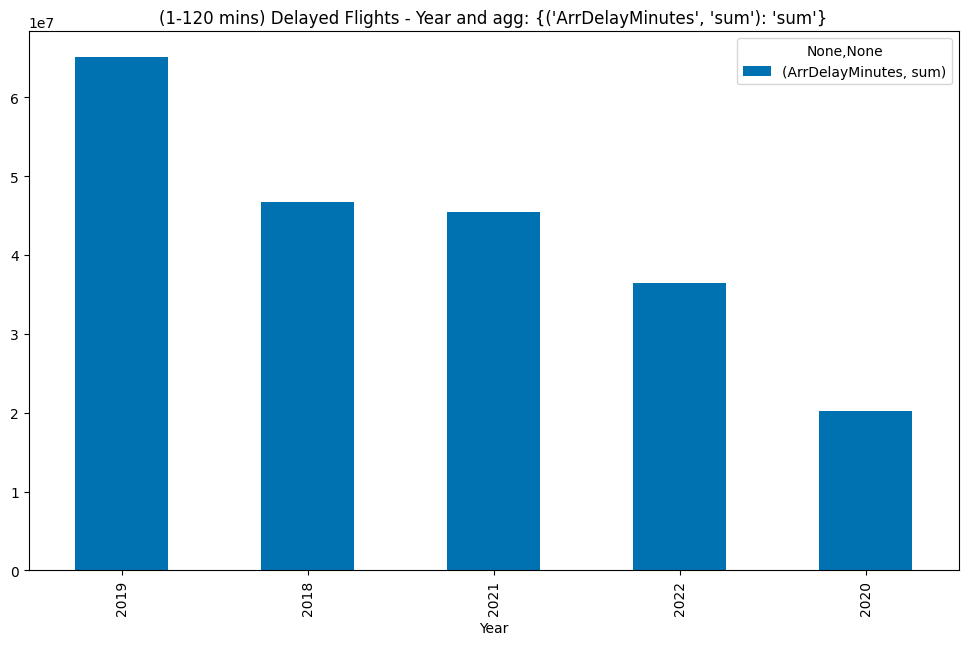

In [42]:

col = 'Year'
agg_col = ('ArrDelayMinutes', 'sum')
agg_type = 'sum'
agg_plot(col, agg_col, agg_type)   

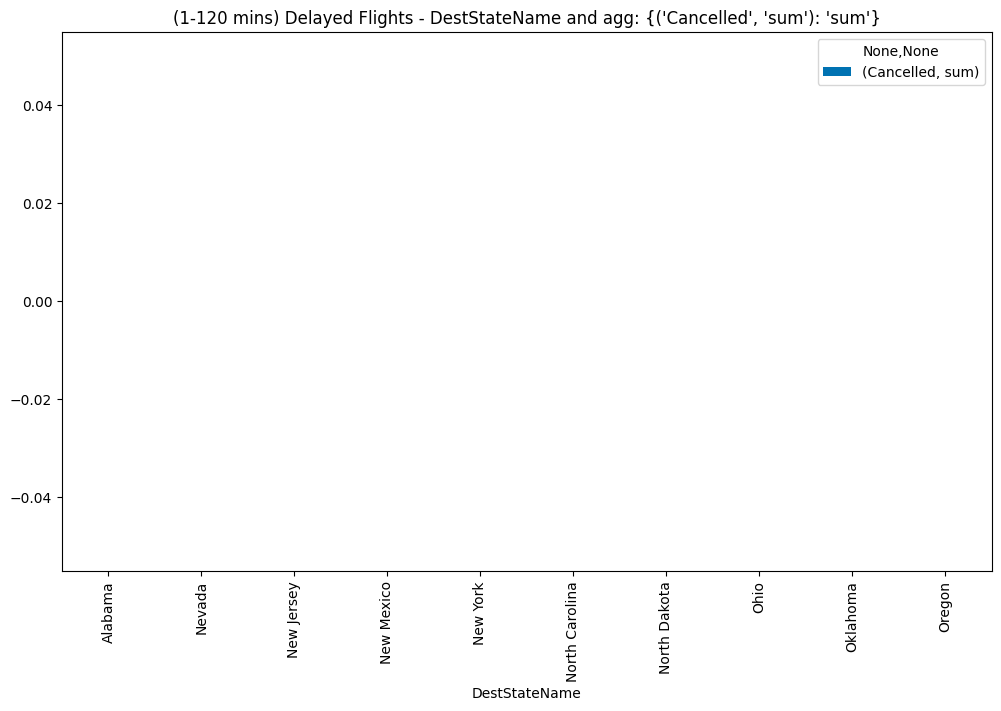

In [43]:

col = 'DestStateName'
agg_col = ('Cancelled', 'sum')
agg_type = 'sum'
agg_plot(col, agg_col, agg_type)   

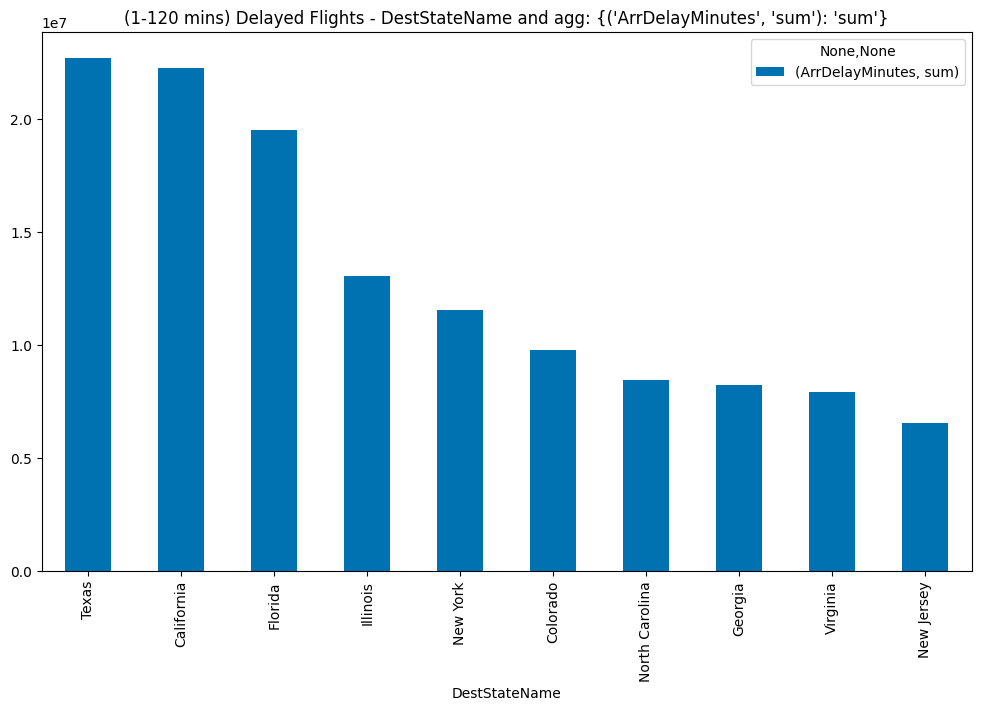

In [44]:

col = 'DestStateName'
agg_col = ('ArrDelayMinutes', 'sum')
agg_type = 'sum'
agg_plot(col, agg_col, agg_type)   

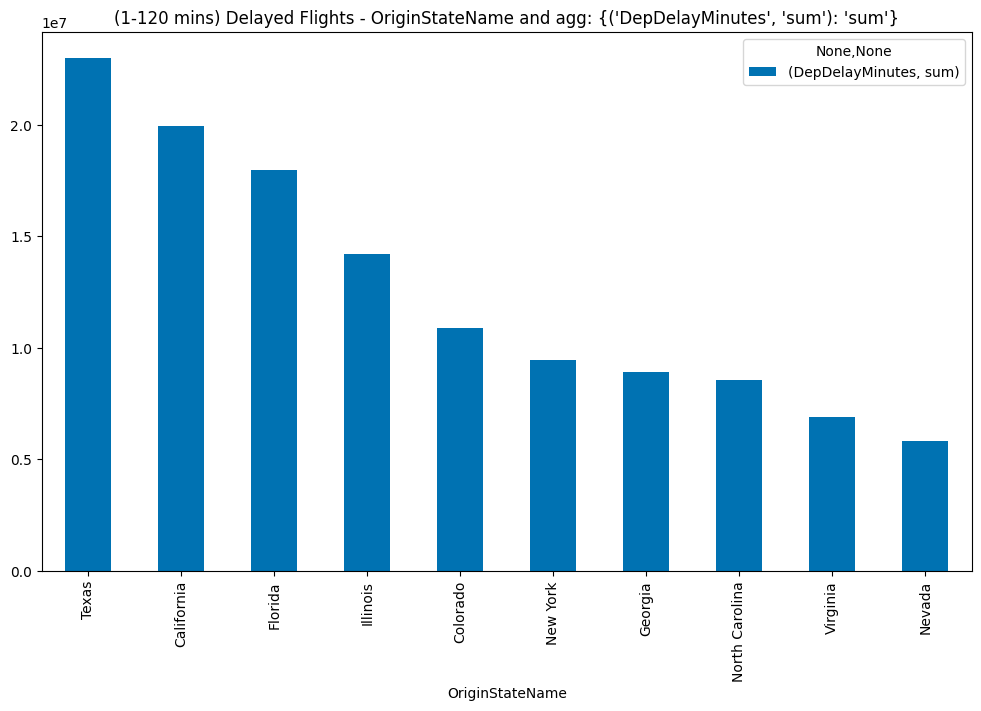

In [45]:

col = 'OriginStateName'
agg_col = ('DepDelayMinutes', 'sum')
agg_type = 'sum'
agg_plot(col, agg_col, agg_type) 

In [39]:


def agg_plot(col, agg_col, agg_type):
    dict_agg = {agg_col: agg_type}
    df_0 = df_loc.groupby(col).agg(dict_agg).reset_index()
    df_0 = df_0.sort_values(by=[agg_col], ascending=False)
    df_0 = df_0.head(10)
#     display(df_0.columns)
#     display(df_0.head())
    
    # fig, axes = plt.subplots(2, 2, figsize=(7, 7))
    ax = df_0.plot.bar(x=col, y=agg_col, rot=90, figsize=(12, 7)) #ax=axes[0][0], font_size=5)
    ax.set_title(f"(1-120 mins) Delayed Flights - {col} and agg: {dict_agg}")

# df_delay_state.plot.bar(column="A", by="DayOfWeek", ax=axes[0][0])
# df_delay_state.plot.box(column="ArrDelayMinutes", by="DayOfWeek", ax=axes[0][1])
# df_delay_state.plot.box(column="DepTime", by="DayOfWeek", ax=axes[1][0])
# df_delay_state.plot.box(column="DepDelayMinutes", by="DayOfWeek", ax=axes[1][1])

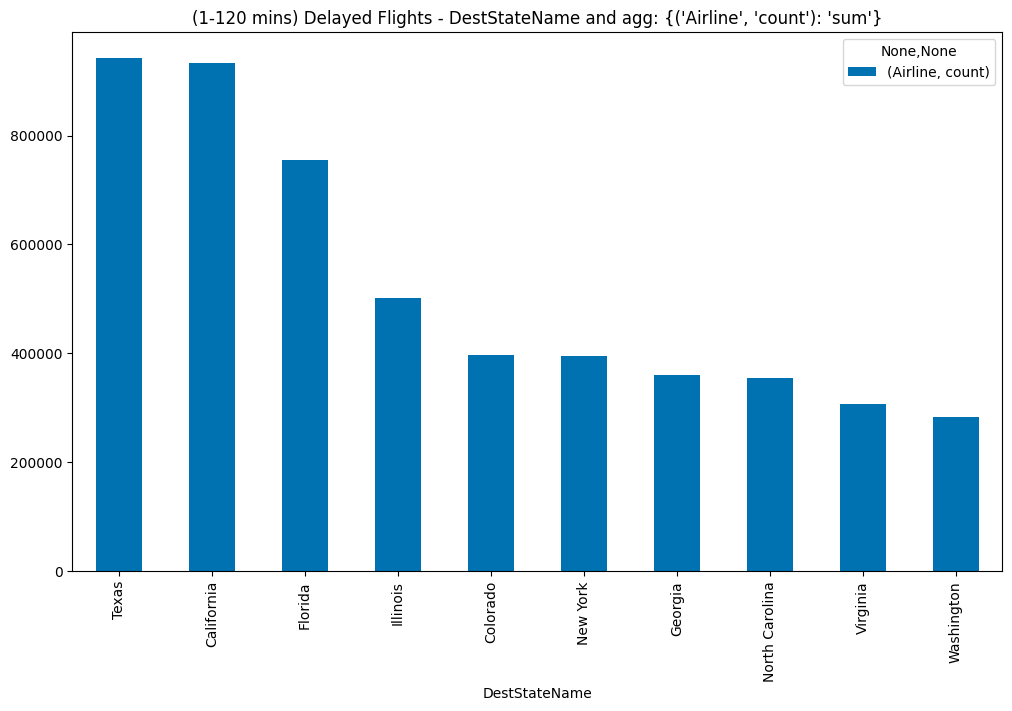

In [36]:

col = 'DestStateName'
agg_col = ('Airline', 'count')
agg_type = 'sum'
agg_plot(col, agg_col, agg_type)    

DepDelayMinutes    AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

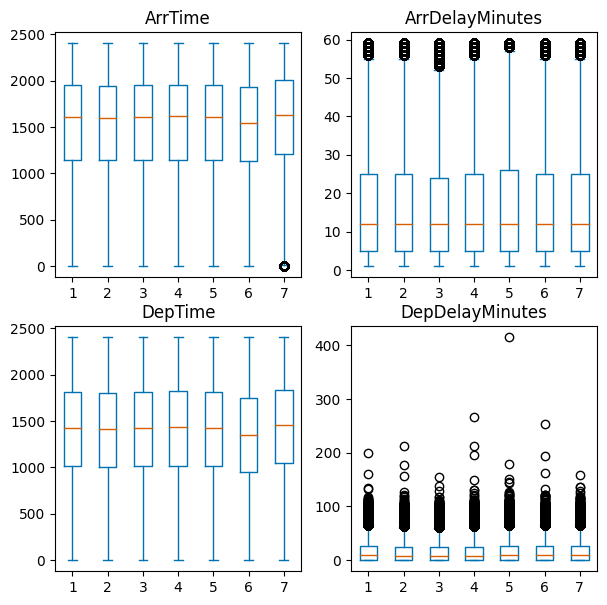

In [24]:
cond_gt0 = df['ArrDelayMinutes'] > 0
cond_lt60 = df['ArrDelayMinutes'] < 60

cond_delay = cond_gt0 & cond_lt60
df_temp = df.loc[cond_delay, ['Year','Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrTime', 'ArrDelayMinutes', 'DepTime', 'DepDelayMinutes']]

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
df_temp.plot.box(column="ArrTime", by="DayOfWeek", ax=axes[0][0])
df_temp.plot.box(column="ArrDelayMinutes", by="DayOfWeek", ax=axes[0][1])
df_temp.plot.box(column="DepTime", by="DayOfWeek", ax=axes[1][0])
df_temp.plot.box(column="DepDelayMinutes", by="DayOfWeek", ax=axes[1][1])

DepDelayMinutes    AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

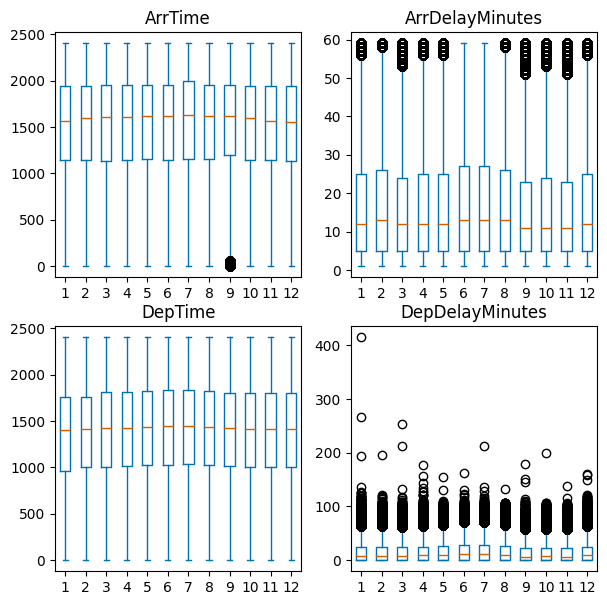

In [25]:

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
df_temp.plot.box(column="ArrTime", by="Month", ax=axes[0][0])
df_temp.plot.box(column="ArrDelayMinutes", by="Month", ax=axes[0][1])
df_temp.plot.box(column="DepTime", by="Month", ax=axes[1][0])
df_temp.plot.box(column="DepDelayMinutes", by="Month", ax=axes[1][1])

DepDelayMinutes    AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

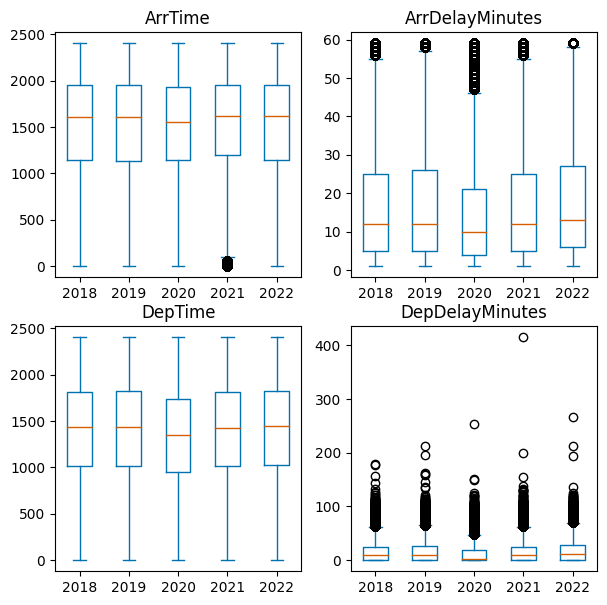

In [26]:

fig, axes = plt.subplots(2, 2, figsize=(7, 7))
df_temp.plot.box(column="ArrTime", by="Year", ax=axes[0][0])
df_temp.plot.box(column="ArrDelayMinutes", by="Year", ax=axes[0][1])
df_temp.plot.box(column="DepTime", by="Year", ax=axes[1][0])
df_temp.plot.box(column="DepDelayMinutes", by="Year", ax=axes[1][1])

DepDelayMinutes    AxesSubplot(0.547727,0.11;0.352273x0.35)
dtype: object

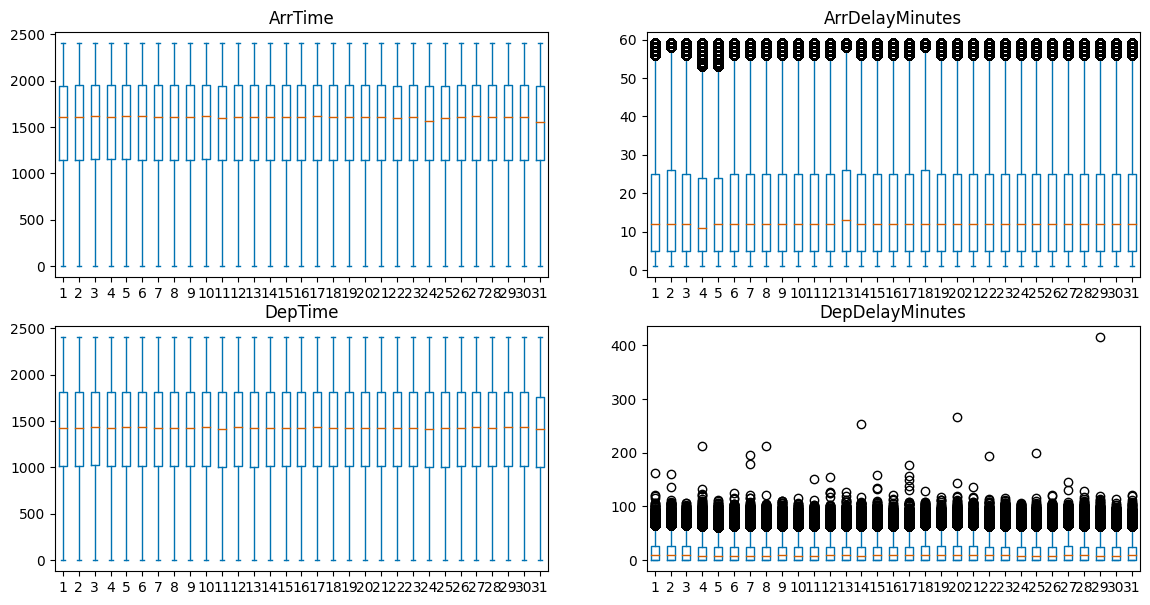

In [29]:

fig, axes = plt.subplots(2, 2, figsize=(14, 7))
df_temp.plot.box(column="ArrTime", by="DayofMonth", ax=axes[0][0])
df_temp.plot.box(column="ArrDelayMinutes", by="DayofMonth", ax=axes[0][1])
df_temp.plot.box(column="DepTime", by="DayofMonth", ax=axes[1][0])
df_temp.plot.box(column="DepDelayMinutes", by="DayofMonth", ax=axes[1][1])

# Histogram of the `ArrDelayMinutes` due to DepDelayMinutes Variable

<AxesSubplot:title={'center':'120 Min < FDD < 720 mins'}, ylabel='Frequency'>

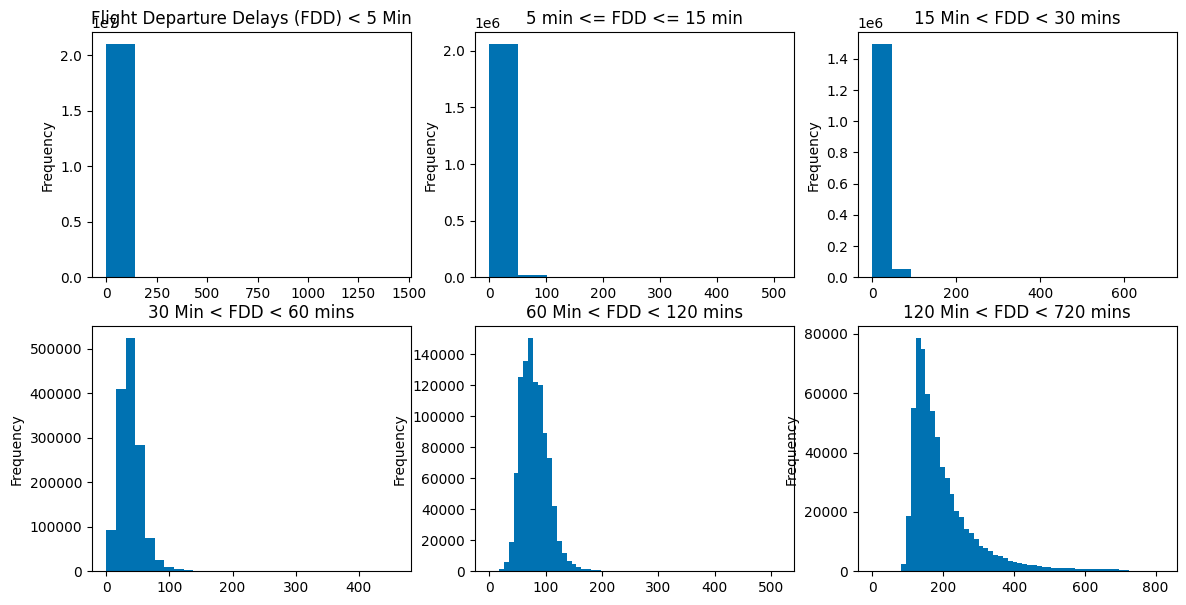

In [45]:

fig, axes = plt.subplots(2, 3, figsize=(14, 7))

df.query("DepDelayMinutes < 5")["ArrDelayMinutes"].plot(
    kind="hist", bins=10, title="Flight Departure Delays (FDD) < 5 Min", ax=axes[0][0])

df.query("DepDelayMinutes > 5 and DepDelayMinutes < 15")["ArrDelayMinutes"].plot(
    kind="hist", bins=10, title="5 min <= FDD <= 15 min", ax=axes[0][1])

df.query("DepDelayMinutes > 15 and DepDelayMinutes < 30")["ArrDelayMinutes"].plot(
    kind="hist", bins=15, title="15 Min < FDD < 30 mins", ax=axes[0][2])

df.query("DepDelayMinutes > 30 and DepDelayMinutes < 61")["ArrDelayMinutes"].plot(
    kind="hist", bins=30, title="30 Min < FDD < 60 mins", ax=axes[1][0])

df.query("DepDelayMinutes > 60 and DepDelayMinutes < 120")["ArrDelayMinutes"].plot(
    kind="hist", bins=60, title="60 Min < FDD < 120 mins", ax=axes[1][1])

df.query("DepDelayMinutes > 120 and DepDelayMinutes < 720")["ArrDelayMinutes"].plot(
    kind="hist", bins=60, title="120 Min < FDD < 720 mins", ax=axes[1][2])

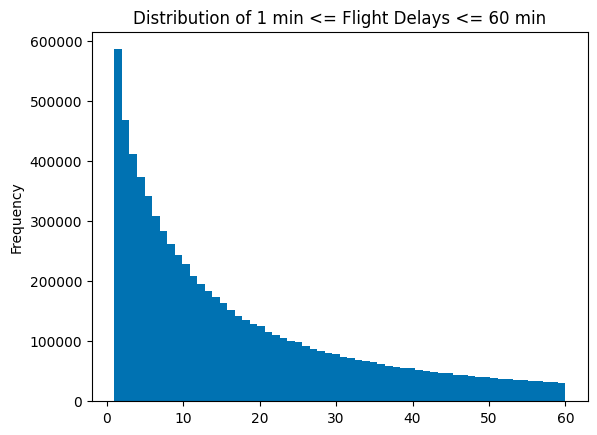

In [31]:
df.query("DepDelayMinutes > 0 and DepDelayMinutes < 61")["DepDelayMinutes"].plot(
    kind="hist", bins=60, title="Distribution of 1 min <= Flight Delays <= 60 min"
)
plt.show()

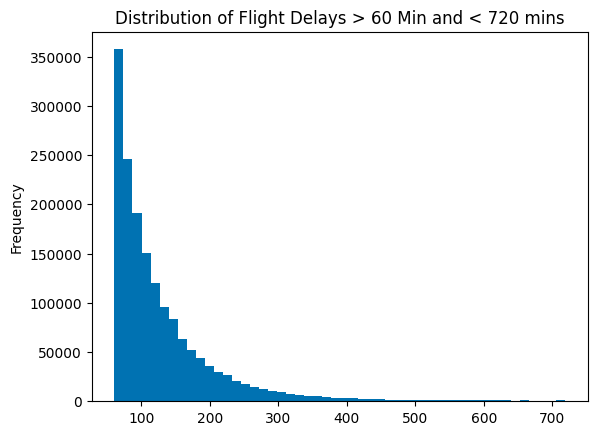

In [37]:
df.query("DepDelayMinutes > 60 and DepDelayMinutes < 720")["DepDelayMinutes"].plot(
    kind="hist", bins=50, title="Distribution of Flight Delays > 60 Min and < 720 mins"
)
plt.show()

# Grouping of Delays
Per Wikipedia https://en.wikipedia.org/wiki/Flight_cancellation_and_delay:
```
Delays are divided into three categories, namely "on time or small delay" (up to 15 minutes delay), "Medium delay" (15 – 45 minutes delay) and "Large delay" ( 45 minutes delay). 
```

In [48]:
df["DelayGroup"] = None
df.loc[df["ArrDelayMinutes"] == 0, "DelayGroup"] = "OnTime_Early"
df.loc[
    (df["ArrDelayMinutes"] > 0) & (df["ArrDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["ArrDelayMinutes"] > 15) & (df["ArrDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"
df.loc[df["ArrDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled"

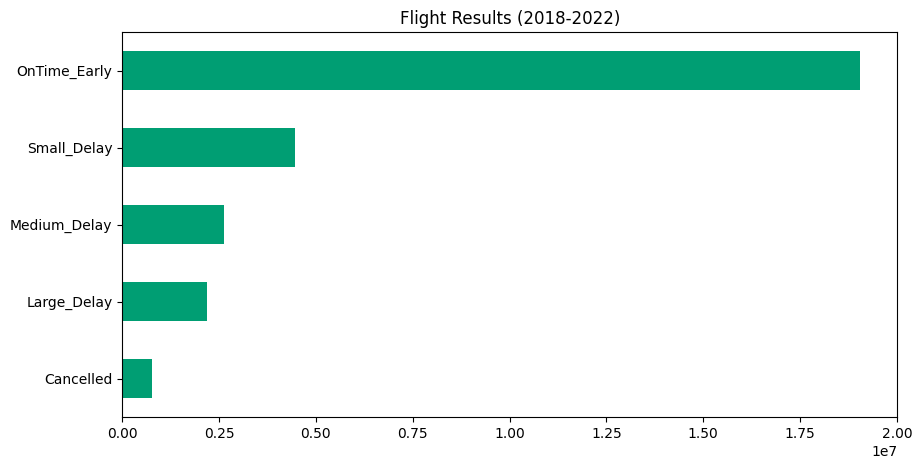

In [49]:
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(10, 5), color=pal[1], title="Flight Results (2018-2022)"
)
plt.show()

# How Many Flights Per Year?

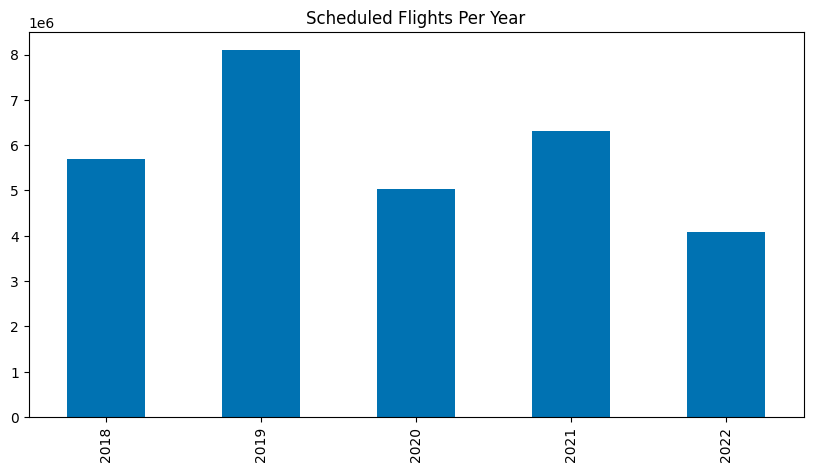

In [50]:
# df["Year"] = df['FlightDate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

# What is the % of Flight Results by Year

In [51]:
# df["Year"] = df["FlightDate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

# Results by Month

In [52]:
# df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

In [55]:
# df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("DayofMonth")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges")

In [57]:
# df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby(["Year", "Quarter"])["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Reds")

## Exclude 2020

In [58]:
# df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year != 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

## Before 2020

In [59]:
# df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year < 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

## After 2021

In [60]:
# df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year > 2020")
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

## Why High Cancellation in March/April? What does it look like by year for these months?

In [61]:
df_agg = (
    df.query("3 <= Month <= 4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges", axis=0)

# Plot using `calmap`

Text(0.5, 0.92, 'US Flight Cancellations')

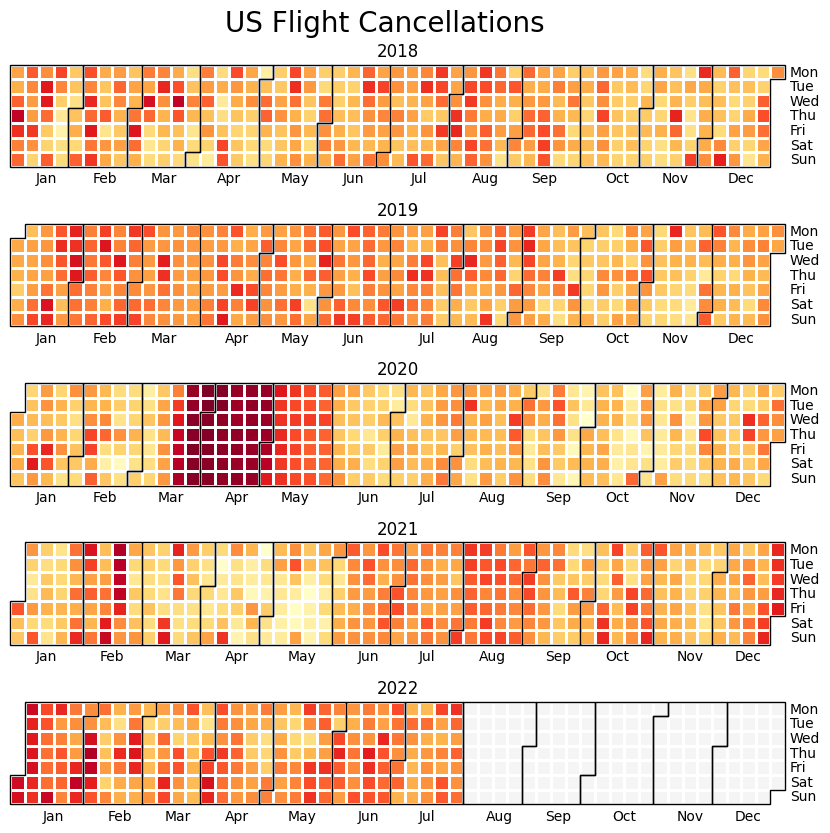

In [62]:
import calmap
events = df.groupby("FlightDate")["Cancelled"].mean()
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

# Interactive Calendar Heatmap

In [63]:
from plotly_calplot import calplot

# creating the plot
fig = calplot(events.apply(np.log).reset_index(), x="FlightDate", y="Cancelled")
fig.show()

# Compare Airlines
- Who has the most delays?
- Who has the most cancellations?
- Who is the most reliable? (on time)

Text(0.5, 0, 'Flights (100k)')

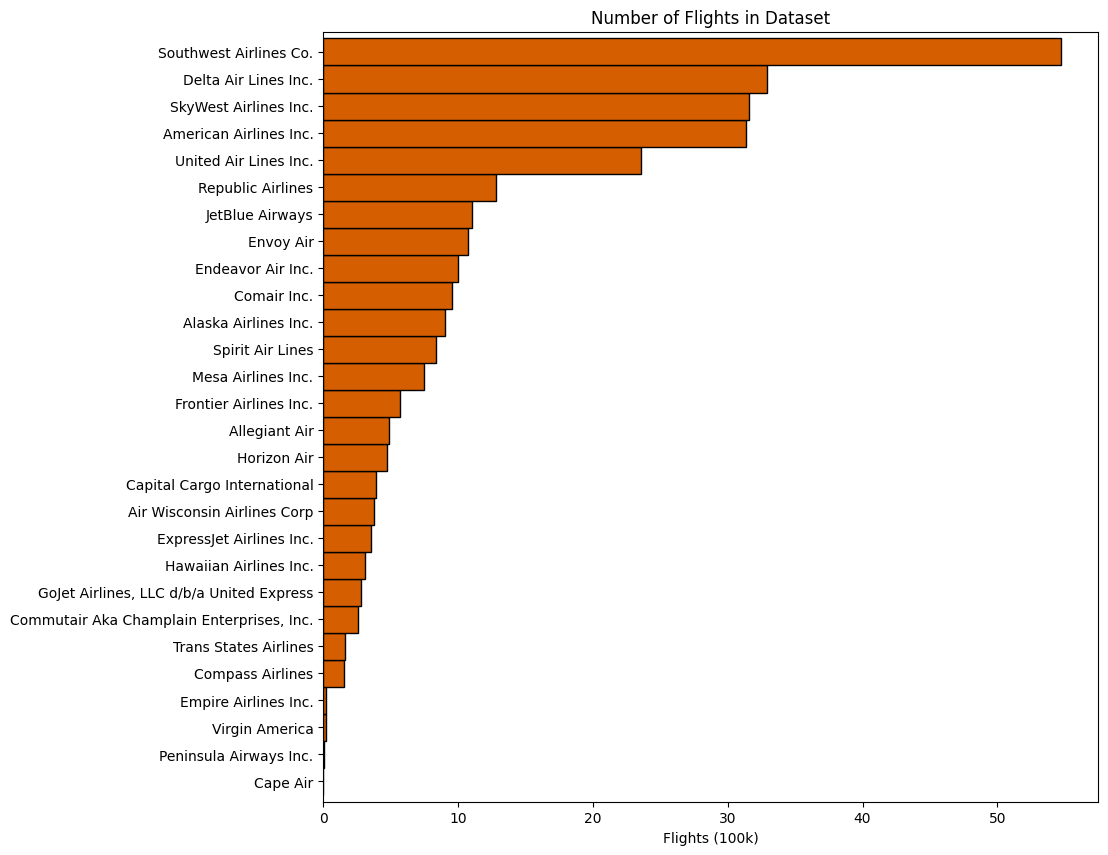

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)
ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")

## Subset to the Top Airlines
- Minimum 1M Flights

In [65]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 1_000_000")["index"]
    .values.tolist()
)

df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [66]:
# Reset airline categories
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

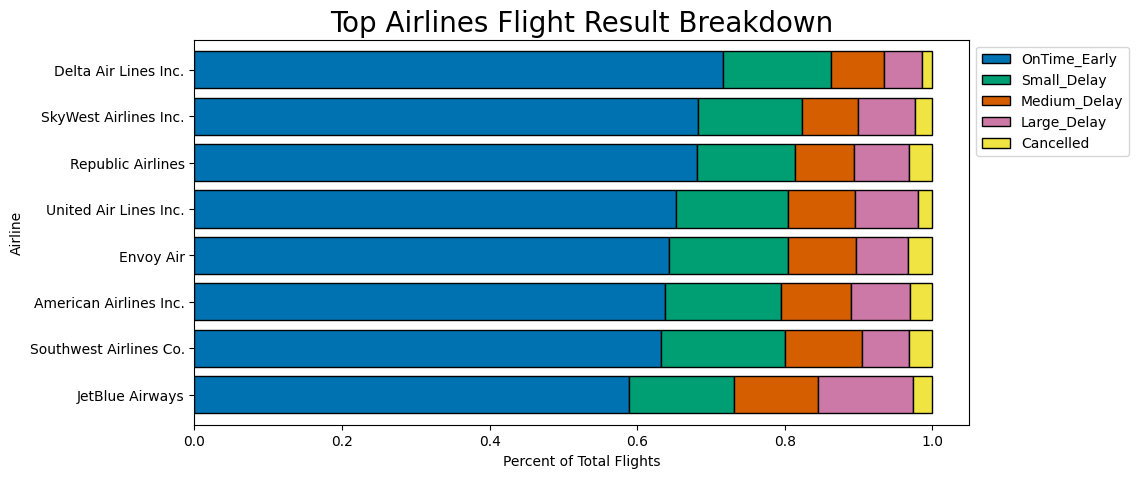

In [67]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

## Split out Each Delay Type and plot

In [68]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

In [69]:
df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

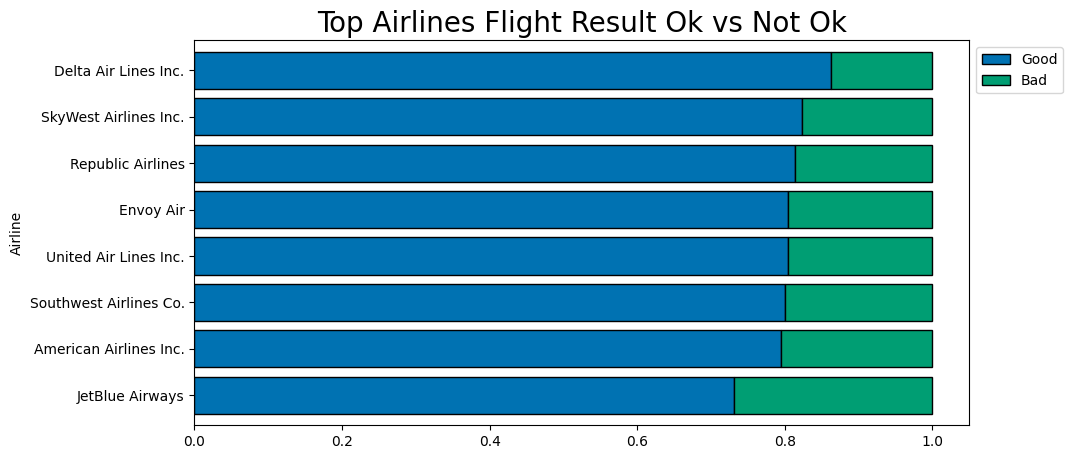

In [70]:
df_agg = (
    df_top.groupby(["Airline"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()